# Homework 4:

## 1. A projectile is fired upwards from the ground. The height of the projectile above the ground is shown in the following table:

- a) Find a good model to fit this data. 
- b) Find the time at which the projectile hit the ground.


In [1]:
# import the package I need:


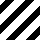
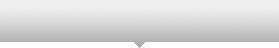
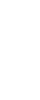
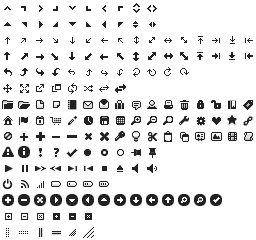
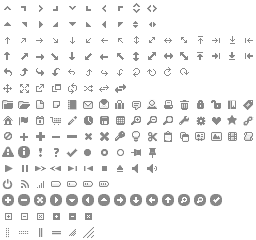
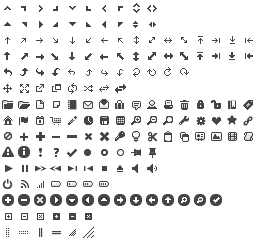
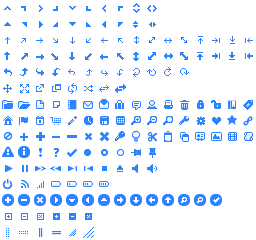
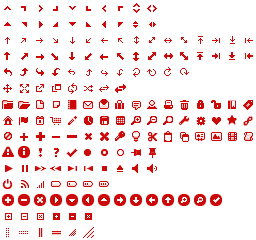
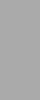
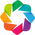
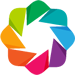
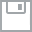
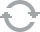
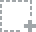
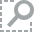
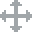
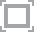
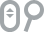

In [2]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

output_notebook()
%matplotlib inline

In [3]:
# Create the dataframe:
data=pd.DataFrame({'Time':[0,0.5,1,1.5,2,2.5],'Height':[0,20.5,31.36,36.25,30.41,28.23]})
data.T

,0,1,2,3,4,5
Height,0,20.5,31.36,36.25,30.41,28.23
Time,0,0.5,1.00,1.50,2.00,2.50


In [4]:
# Visualized the data point:

x=data.Time
y=data.Height

p = figure(width=300, height=300)
p.circle(x, y, fill_color="red", line_color="red", size=6)
p.line(x=data.Time, y=data.Height, color='red')
show(p)

Our data visualization suggests that it is probably a quadratic function.

In [5]:
# Linear Model: we got r-square of 0.847

res = sm.OLS(y, x).fit()
res.summary()

//anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     27.67
Date:                Tue, 24 Nov 2015   Prob (F-statistic):            0.00330
Time:                        15:50:25   Log-Likelihood:                -22.702
No. Observations:                   6   AIC:                             47.40
Df Residuals:                       5   BIC:                             47.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Time          16.5367      3.143      5.261      0.003         8.456    24.617
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.701
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.565
Skew:                          -0.467   Prob(JB):                        0.754
Kurtosis:                       1.821   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Quadratic Model: we got r-square of 0.974
# This is a better model than a linear model.

X = np.c_[x**2, x, np.ones(len(x))]

res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.76
Date:                Tue, 24 Nov 2015   Prob (F-statistic):            0.00424
Time:                        15:50:25   Log-Likelihood:                -12.448
No. Observations:                   6   AIC:                             30.90
Df Residuals:                       3   BIC:                             30.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -12.8714      1.784     -7.216      0.005       -18.548    -7.195
x2            42.2226      4.646      9.088      0.003        27.438    57.007
const          1.1771      2.469      0.477      0.666        -6.682     9.036
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.645
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.010
Skew:                          -0.984   Prob(JB):                        0.603
Kurtosis:                       2.587   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# I use quadratic model to predict.

X = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

p = figure(title='Prediction',width=400, height=400)
p.circle(x, y, size=8,color='red')

xx = np.arange(0,3.5,0.1)
p.line(xx, res.predict(np.vander(xx,3)), color='red')
show(p)

### Find the time at which the projectile hit the ground.

In [8]:
xx = np.arange(0,3.5,0.001)

for x in xx:
    h=res.predict([x**2,x,1])[0]
    if h==0:
        break
print 'projectile hit the grounf when time(s) is: ', x

projectile hit the grounf when time(s) is:  3.499


## 2. Healthcare costs have been increasing over the years. The following data shows the average cost of healthcare per person from 1976 to 1998: Year 1976 1980 1987 1993 1998 Cost (per person) 618 860 1324 1865 2256 

- a) Find a model that fits the data well. 
- b) Find the time the average healthcare cost will reach 2800 per person.


In [9]:
data=pd.DataFrame({'Year':[1976, 1980, 1987, 1993, 1998],'Cost':[618, 860, 1324, 1865, 2256]})
data.T

,0,1,2,3,4
Cost,618,860,1324,1865,2256
Year,1976,1980,1987,1993,1998


In [10]:
# Visualized the data point:

x=data.Year
y=data.Cost

p = figure(width=300, height=300)
p.circle(x, y, fill_color="green", line_color="green", size=6)
p.line(x, y, color='blue')
show(p)

It looks like the cost follows a linear growth.

In [11]:
res = sm.OLS(y, x).fit()
res.summary()

//anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     21.11
Date:                Tue, 24 Nov 2015   Prob (F-statistic):             0.0101
Time:                        15:50:25   Log-Likelihood:                -39.110
No. Observations:                   5   AIC:                             80.22
Df Residuals:                       4   BIC:                             79.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Year           0.6981      0.152      4.595      0.010         0.276     1.120
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.388
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.475
Skew:                           0.158   Prob(JB):                        0.789
Kurtosis:                       1.524   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = np.c_[x**2, x, np.ones(len(x))]

res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     850.1
Date:                Tue, 24 Nov 2015   Prob (F-statistic):            0.00117
Time:                        15:50:25   Log-Likelihood:                -22.290
No. Observations:                   5   AIC:                             50.58
Df Residuals:                       2   BIC:                             49.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7686      0.307      2.505      0.129        -0.552     2.089
x2         -2979.0768   1219.498     -2.443      0.135     -8226.151  2267.998
const       2.886e+06   1.21e+06      2.382      0.140     -2.33e+06   8.1e+06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.226
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.403
Skew:                           0.583   Prob(JB):                        0.817
Kurtosis:                       2.240   Cond. No.                     3.24e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

xx = np.arange(1995,2010,1)

p = figure(title='Prediction',width=400, height=400)
p.circle(xx, res.predict(np.vander(xx,3)), size=8,color='green')

p.line(xx, res.predict(np.vander(xx,3)), color='green')
show(p)

In [14]:
xx = np.arange(1995,2010,1)

for x in xx:
    cost=res.predict([x**2,x,1])[0]
    if cost>2800:
        break
print 'Cost will be over $2800 in year', x

Cost will be over $2800 in year 2004


In [15]:
res.predict([2003**2,2003,1])

array([ 2751.54519065])

# 3. Here’s another dataset:

x = [-1, 0, 1, 2, 3, 5, 7, 9]  
y = [-1.0, 3.0, 2.5, 5.0, 4.0, 2.0, 5.0, 4.0]

* a) Find a good model to fit this data.
* b) Play around with different forms of regularization to see the effect and choose one.

In [16]:
data = pd.DataFrame({'X':[-1,0,1,2,3,5,7,9],'Y':[-1,3,2.5,5,4,2,5,4]})
data.T

,0,1,2,3,4,5,6,7
X,-1,0,1.0,2,3,5,7,9
Y,-1,3,2.5,5,4,2,5,4


In [17]:
x=data.X
y=data.Y

p = figure(width=300, height=300)
p.circle(x, y, fill_color="red", line_color="red", size=6)
p.line(x, y, color='red')
show(p)

In [18]:
# Try different models to see which one get the most 'fit' to my data.

X1 = np.c_[x, np.ones(len(x))]
X2 = np.c_[x**2, x, np.ones(len(x))]
X3 = np.c_[x**3, x**2, x, np.ones(len(x))]
X4 = np.c_[x**4, x**3, x**2, x, np.ones(len(x))]
X5 = np.c_[x**5, x**4, x**3, x**2, x, np.ones(len(x))]
X6 = np.c_[x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]
X7 = np.c_[x**7, x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]

Xs=[X1,X2,X3,X5,X6,X7]
Rsq=[]

for X in Xs:
    key=X
    res = sm.OLS(y, X).fit()
    Rsq.append(res.rsquared)

Rsq

[0.31035779268300867,
 0.49210052111119007,
 0.66141291832934668,
 0.86517279522525525,
 0.93489885078578971,
 1.0]

In [19]:
X6 = np.c_[x**6, x**5, x**4, x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X6).fit()

p = figure(title='Blue = True; Red = OLS',width=300, height=300)
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1,9,100)
p.line(xx, res.predict(np.vander(xx,7)), color='red')
show(p)

In [20]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1)
lasso = Lasso(alpha = 1)

# Original datapoint:
p = figure(title='Blue = True; Red = OLS',width=300, height=300)
p.circle(x, y, size=8,color='blue')

# Prediction without regularization:
xx = np.linspace(-1,9,100)
p.line(xx, res.predict(np.vander(xx,7)), color='red')


# Prediction with regulatization:
ridge.fit(X6, y)
p.line(xx, ridge.predict(np.vander(xx,7)), color='black')


lasso.fit(X6, y)
p.line(xx, lasso.predict(np.vander(xx,7)), color='green')
show(p)



//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


# 4. Download the red wine quality data from here:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality


In [21]:
data_red=pd.read_csv("~/DAT_SF_18/homework/HW4/winequality-red.csv", sep=";")

In [22]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


# 5. Import the dataset to a Pandas dataframe and explore the data using a scatter matrix plot.
a. Do you notice any correlation?  
b. What can you say about the quality score?  
c. How many features are there? Are they normalized?  

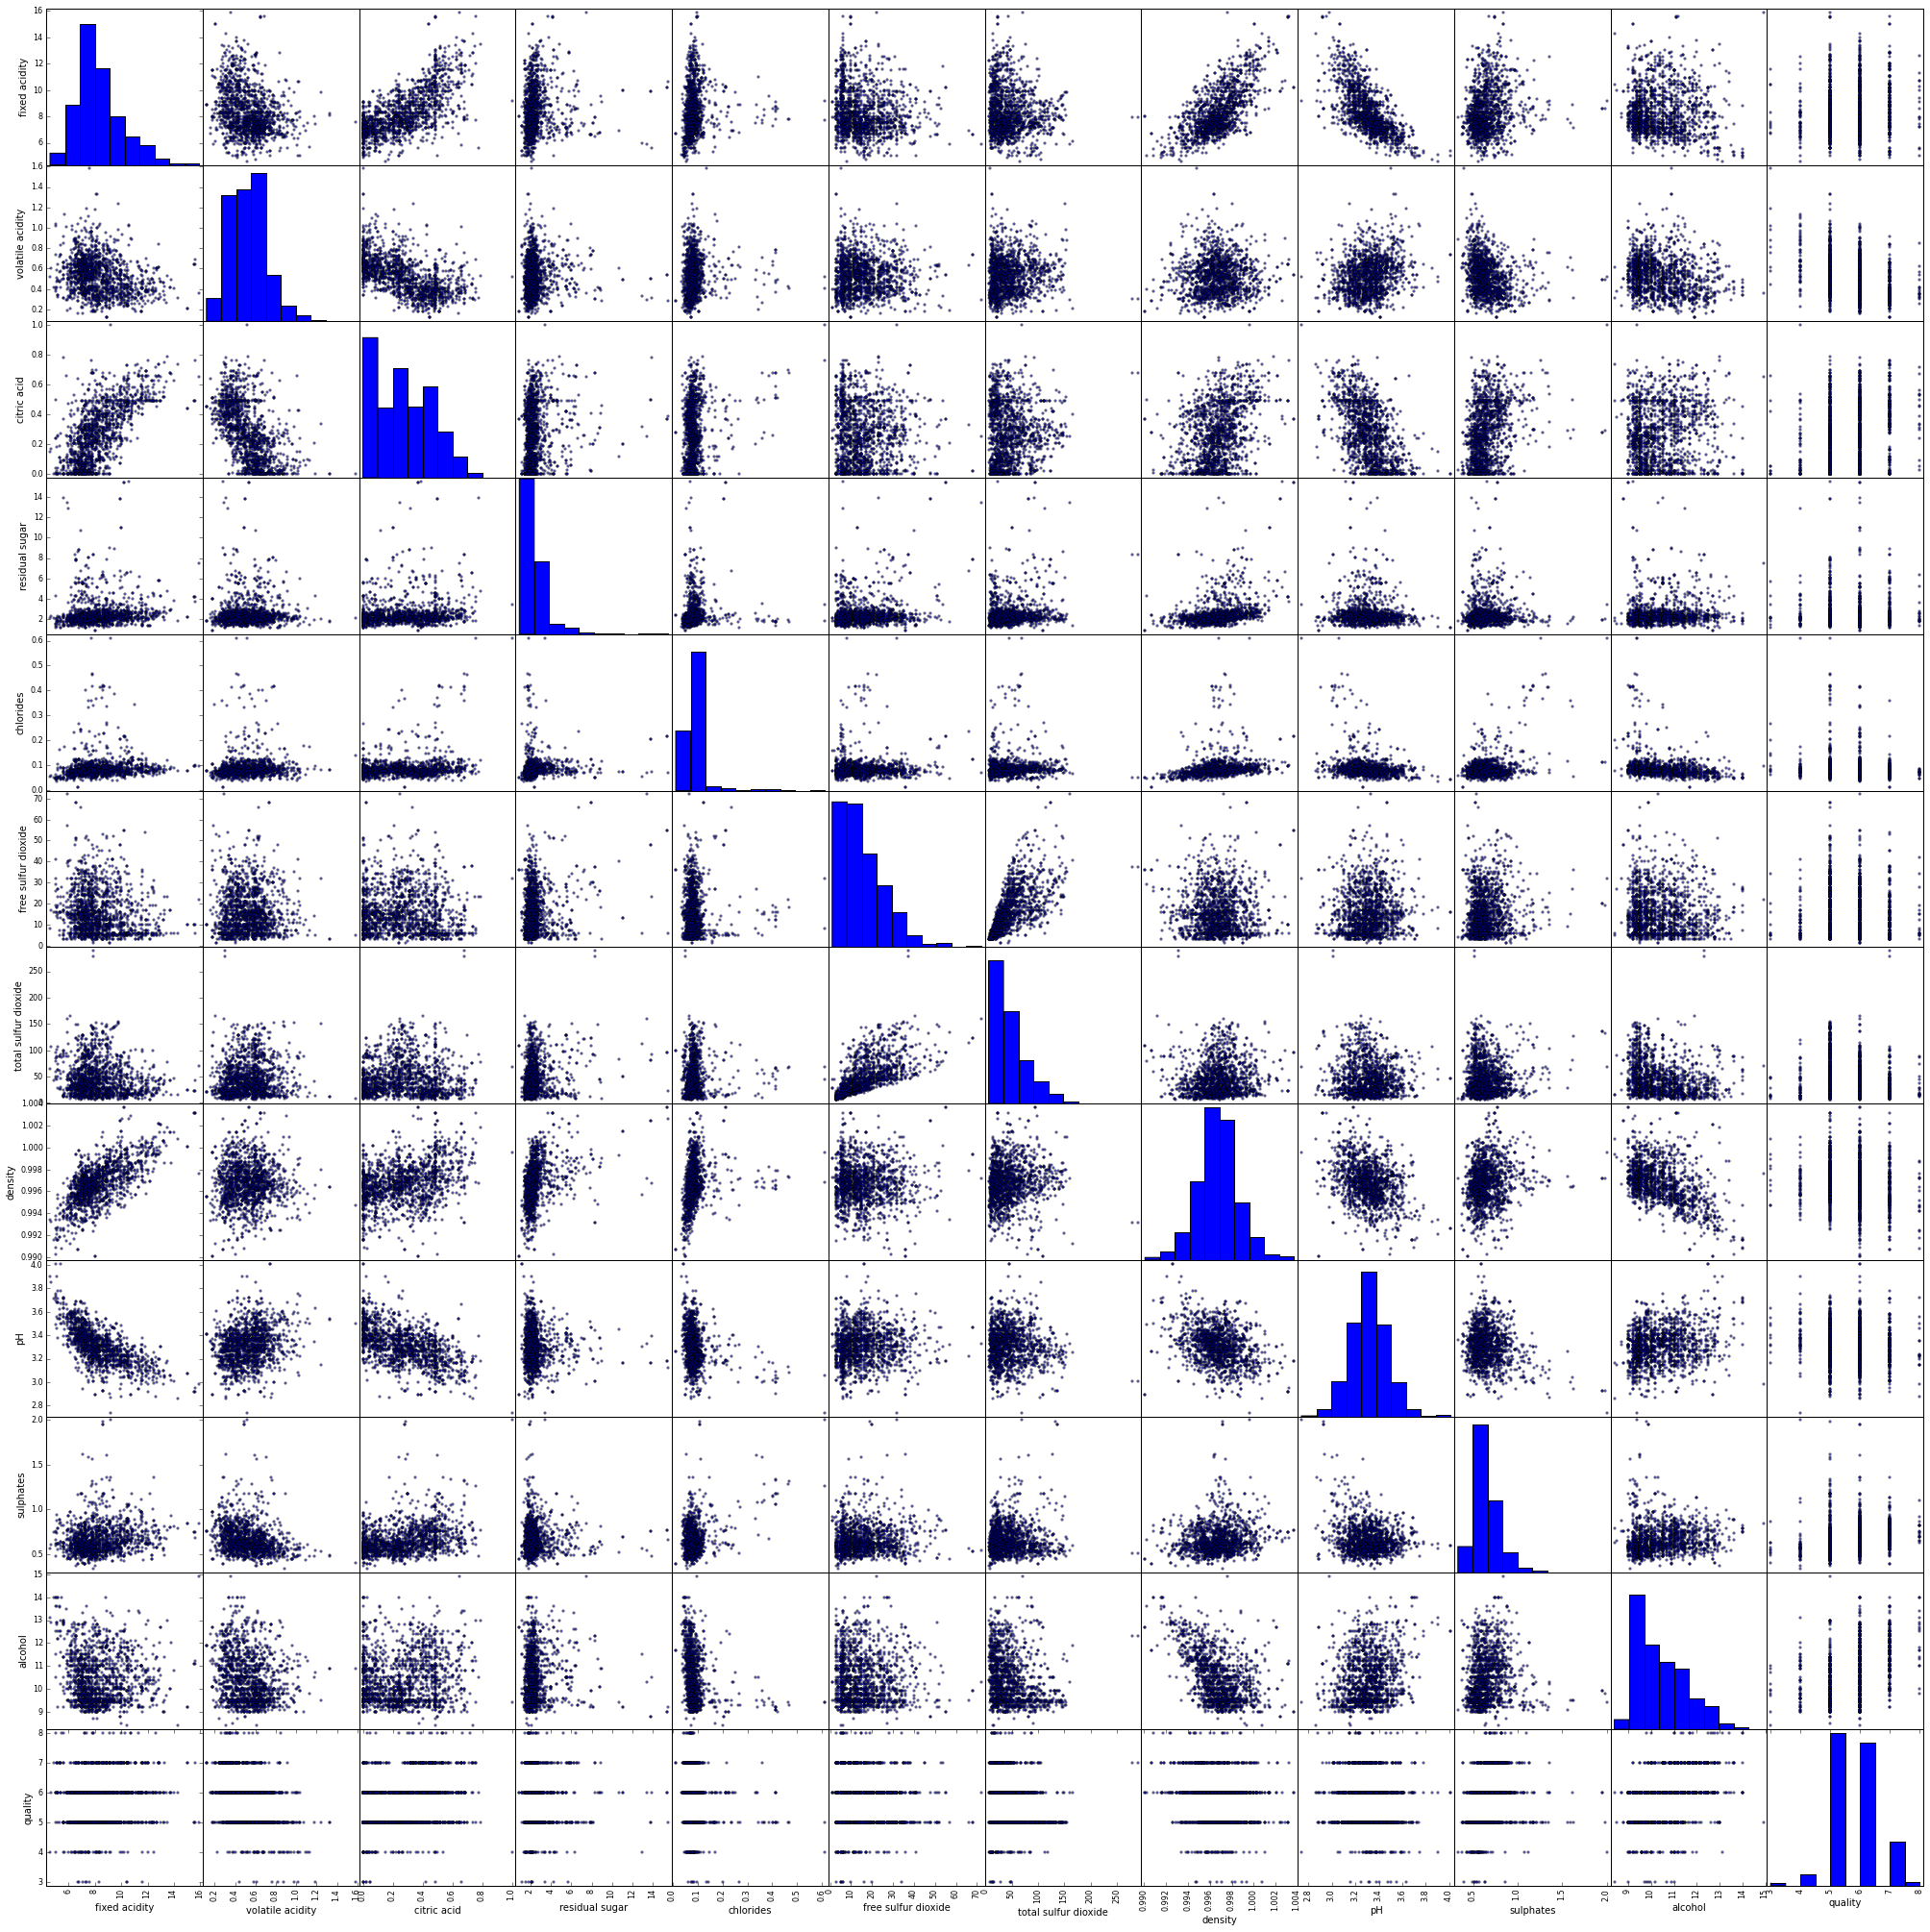

In [23]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data_red, figsize = (35,35))

### b) Quality Score  


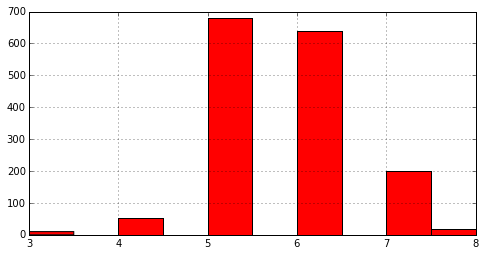

In [24]:
import matplotlib.pyplot as plt

p_red=data_red.quality.hist(color='red',figsize=(8, 4))


In [25]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
# Besides visually observe from scatter matrix, I find numpy has a function to compute pairwise correlation of columns
data_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [27]:
data_red.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null bool
volatile acidity        1599 non-null bool
citric acid             1599 non-null bool
residual sugar          1599 non-null bool
chlorides               1599 non-null bool
free sulfur dioxide     1599 non-null bool
total sulfur dioxide    1599 non-null bool
density                 1599 non-null bool
pH                      1599 non-null bool
sulphates               1599 non-null bool
alcohol                 1599 non-null bool
quality                 1599 non-null bool
dtypes: bool(12)
memory usage: 31.2 KB


### a) Correlation:   
From the scatter matrix above, we can observe some correlations in features. I first visually look for correlation:  
- **citric acid** is positive correlated with **fixed acidity**, but negative correlated with **volatile acidity**. 
- **density** is positive correlated with both  **citric acid** & **fixed acidity**, but negative correlated with **alcohol**.
- **pH** value is negative correlated with **density**, **citric acid** & **fixed acidity**.

Then I use numpy function to examine their correlation to see if I miss anything:
- **residual sugar** is positively correlated with **free sulfur dioxide** & **total sulfur dioxide**.
- **residual sugar** is also highly corrlated with **density** (0.355283)
- **free sulfur dioxide** & **total sulfur dioxide** are highly correlated. (0.667666)

### b) Quality Scores:  
- quality scores range from 3-8.
- the distribution of the quality socres are not normally distributed. It dispropotionally concentreats in 5 & 6.

### c) Features:
- we have 11 features (excludes 'quality', which we'd like to predict)
- they are not normalized. We might want to normalized some features with higher value like: fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, and alcohol.

# 6. Use a generalized linear model to predict the quality score of the wine.  
a. What precautions will you take to account for the imbalance between different the amount of data in each class?  
b. How will you treat the fact that the score is discrete in value?  

In [28]:
# normalize our data first:
df = data_red
def unityNorm(df):
    norm_df = df
    for column in df.columns[0:11]:
        col_min = df[column].min()
        col_max = df[column].max()
        norm_df[column] = df[column].apply(lambda x:(x-col_min)/float(col_max-col_min))
    return norm_df

norm_df=unityNorm(df)
norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,0.329171,0.154079,0,0.221239,0.292035,0.407080,1
volatile acidity,1599,0.279329,0.122644,0,0.184932,0.273973,0.356164,1
citric acid,1599,0.270976,0.194801,0,0.090000,0.260000,0.420000,1
residual sugar,1599,0.112247,0.096570,0,0.068493,0.089041,0.116438,1
chlorides,1599,0.125988,0.078573,0,0.096828,0.111853,0.130217,1
free sulfur dioxide,1599,0.209506,0.147326,0,0.084507,0.183099,0.281690,1
total sulfur dioxide,1599,0.142996,0.116238,0,0.056537,0.113074,0.197880,1
density,1599,0.490211,0.138571,0,0.406021,0.490455,0.570117,1
pH,1599,0.449695,0.121564,0,0.370079,0.448819,0.519685,1
sulphates,1599,0.196496,0.101501,0,0.131737,0.173653,0.239521,1


In [29]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB

In [44]:
# I use StratifiedShuffleSplit: 
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns 
# stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

sss = StratifiedShuffleSplit(norm_df.quality, 3, test_size=0.2, random_state=0)
print sss

StratifiedShuffleSplit(labels=[5 5 5 ..., 6 5 6], n_iter=3, test_size=0.2, random_state=0)


In [45]:
for train_index, test_index in sss:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = norm_df.iloc[train_index], norm_df.iloc[test_index]
    y_train, y_test = norm_df.quality.iloc[train_index], norm_df.quality.iloc[test_index]

('TRAIN:', array([ 812, 1266, 1421, ...,  179, 1447,  894]), 'TEST:', array([ 954, 1347,  174, 1002, 1515, 1228, 1492,  724,  216,  709, 1535,
        390, 1594,   66,  246,   94, 1419,  811,  792,  414, 1546,   64,
       1437, 1442,  701, 1030,  104,  132,  125, 1026,  327,  501,  321,
        596,  374,  505, 1112,  874, 1148, 1282,  438,  637,  188,  950,
        434,  118, 1449,  887, 1116,  152,   39,  538, 1294, 1285,  875,
       1290, 1045,  783,  247, 1171,  437,  195, 1199,   62,  400,  748,
       1543,  512,  568,  655, 1015,  280,  959,  424,  996,  439, 1336,
         65,  255, 1541, 1009,  303,  181,  289,  127,  183, 1571,  715,
        435,   57,  513,   59, 1454,  465, 1457,  294,  417, 1059, 1132,
         38,  482,   87,  809,  228,  984, 1359,  750, 1318,  301, 1322,
        956,   72, 1358,  430,  615,  722,  631, 1122,  681, 1180, 1042,
        464, 1568,  624,  361,  234,  881,  753,  385, 1173, 1534,  529,
       1483,  775,  396,  945,  518,  241, 1020,  222,

In [57]:
# I use all the features in one regression model:

model=LinearRegression()
features = norm_df.drop('quality',axis=1)
label = norm_df.quality

cross_val_score(model, features, label, cv=sss)

array([ 0.38006733,  0.34040804,  0.42063931])

In [59]:
model=KNeighborsClassifier(5)
features = norm_df.drop('quality',axis=1)
label = norm_df.quality

cross_val_score(model, features, label, cv=sss)

array([ 0.57632399,  0.57632399,  0.61682243])

In [61]:
model=MultinomialNB()

features = norm_df.drop('quality',axis=1)
label = norm_df.quality

cross_val_score(model, features, label, cv=sss)

array([ 0.54205607,  0.51401869,  0.54517134])

# 7. How will you assess the goodness of your model? (hint: has to do with errors)

# 8. Check if regularization improves the outcome of your predictions

# Read about Generalized Linear Models implemented in Scikit Learn here:   
http://scikit-learn.org/stable/modules/linear_model.html